In [119]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [81]:
iris = load_iris()
df = pd.DataFrame (iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# K-Means Clustering

In [83]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [84]:
kmeans = KMeans(n_clusters=3,init='k-means++', n_init=10,max_iter=300)
kmeans.fit_predict(scaled_features)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [85]:
df["Cluster"]=kmeans.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [86]:
# sns.pairplot(df, hue='Cluster', palette='viridis')
# plt.suptitle("Pair Plot of Iris Dataset with K-Means Clusters", y=1.02)
# plt.show()

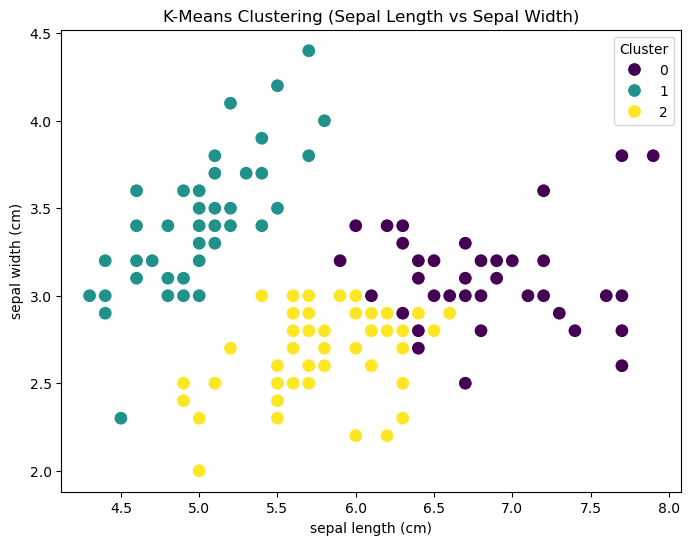

In [87]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title("K-Means Clustering (Sepal Length vs Sepal Width)")
plt.show()

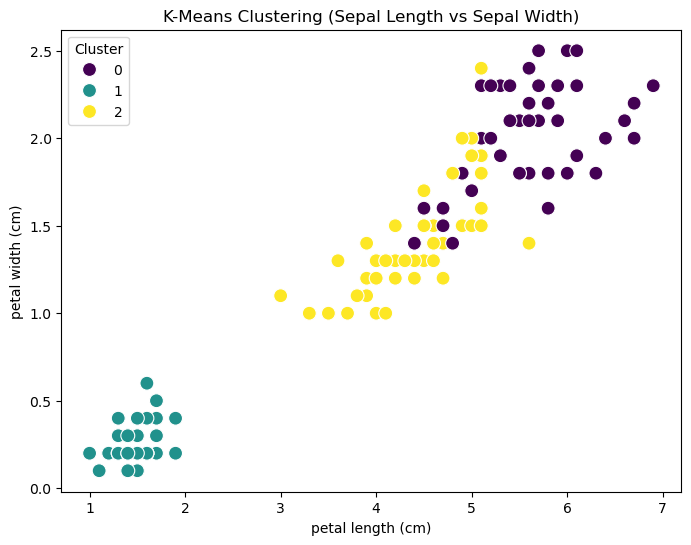

In [88]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title("K-Means Clustering (Sepal Length vs Sepal Width)")
plt.show()

K-Means Clustering is an unsupervised clustering method and as the iris dataset is mainly used for unsupervised learning, therefore this method is ideal for clustering as the dataset have clear, separable clusters. 

K-Means Clustering works by clustering data into distinct groups based on similar features.

# Hierarchial Clustering

In [109]:
linked = linkage(scaled_features, method='ward')

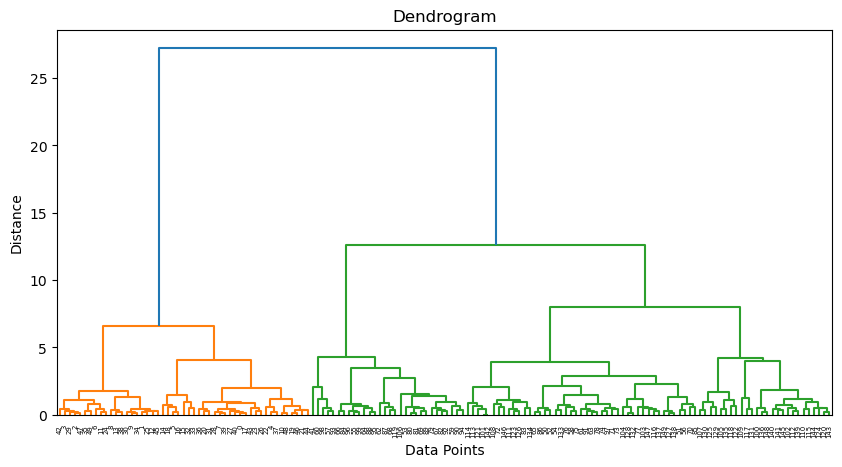

In [113]:
plt.figure(figsize=(10, 5))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
dendrogram(linked)
plt.show()

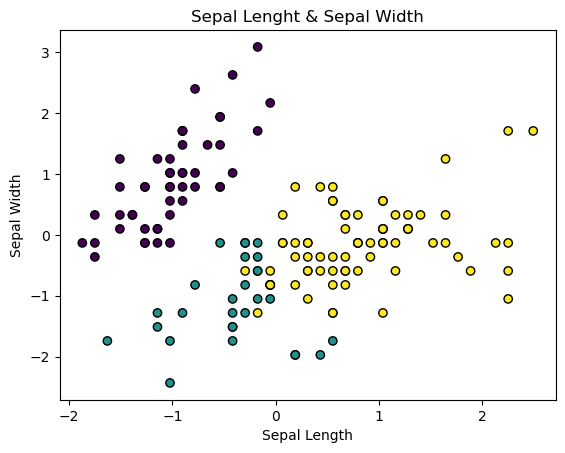

In [135]:
num_clusters = 3
clusters = fcluster(linked, num_clusters, criterion='maxclust')

plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis', edgecolors='k')
plt.title('Sepal Lenght & Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Hierarchical Clustering is an unsupervised machine learning algorithm used for grouping data points into a hierarchy of clusters.
The Iris dataset has a natural hierarchical structure with three distinct species, therefore Hierarchical Clustering can capture this structure effectively.